In [63]:
#Analysis summary. 
#Education Level- Associates has higher probability of getting laid off
#Length closer to 837 days (2 years) less probability of getting laid off. 
#Length closer to 3858 (10.5 years) days 
#Energy, Oil and Gas with long duration of employment higher chance of laid off

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [93]:
common_companies = pd.read_csv("C:/Users/whatr/BayArea/TrainingDatasetV3.csv", encoding = "utf8")

C:\Users\whatr\Anaconda3\envs\data-x\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [94]:
common_companies.head()

,Unnamed: 0,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,...,Company,Company_Norm,Ticker,Exchange,Location,Industry,Layoff Date,Company Name,Employees Affected,laid_off
0,0,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,Software Engineering,0.570285,Web Development,0.277136,San Ramon,United States,...,VMware,VMware,VMW,XNYS,"san francisco, ca",Computer Systems Design,3/12/2018,"VMware, Inc",159,0.0
1,1,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,Software Engineering,0.570285,Web Development,0.277136,San Ramon,United States,...,VMware,VMware,VMW,XNYS,"san francisco, ca",Computer Systems Design,3/28/2016,"VMware, Inc",170,0.0
2,6,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,Software Engineering,0.664485,Web Development,0.236152,San Francisco,United States,...,Intel Corporation,Intel Corporation,INTC,XNAS,"portland, oregon area",Semiconductor Manufacturing,6/30/2018,Intel Corporation,65,0.0
3,7,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,Software Engineering,0.664485,Web Development,0.236152,San Francisco,United States,...,Intel Corporation,Intel Corporation,INTC,XNAS,"portland, oregon area",Semiconductor Manufacturing,12/31/2016,Intel Corporation,84,0.0
4,8,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,Software Engineering,0.664485,Web Development,0.236152,San Francisco,United States,...,Intel Corporation,Intel Corporation,INTC,XNAS,"portland, oregon area",Semiconductor Manufacturing,2/24/2017,Intel Corporation,54,0.0


In [66]:
print(common_companies.columns.values)

['Unnamed: 0' 'ID' 'Birth Year' 'Gender Flag' 'Skillset1'
 'Skillset1 Weight' 'Skillset2' 'Skillset2 Weight' 'City of profile'
 'Country of profile' 'Education' 'Elite Institution' 'Start Date'
 'StartFlag' 'End Date' 'EndFlag' 'CurrentEmployFlag' 'Length' 'Role'
 'Dept' 'Company' 'Company_Norm' 'Ticker' 'Exchange' 'Location' 'Industry'
 'Layoff Date' 'Company Name' 'Employees Affected' 'laid_off']


In [67]:
common_companies.shape

(95770, 30)

In [95]:
# Select the features
common_companies_topfeatures = common_companies[['laid_off','Birth Year','Skillset1','Skillset2','Length','Education','Gender Flag']]

In [119]:
common_companies_topfeatures[['laid_off']].eq(1).sum()

laid_off    7048
dtype: int64

In [120]:
common_companies_topfeatures[['laid_off']].eq(0).sum()

laid_off    88715
dtype: int64

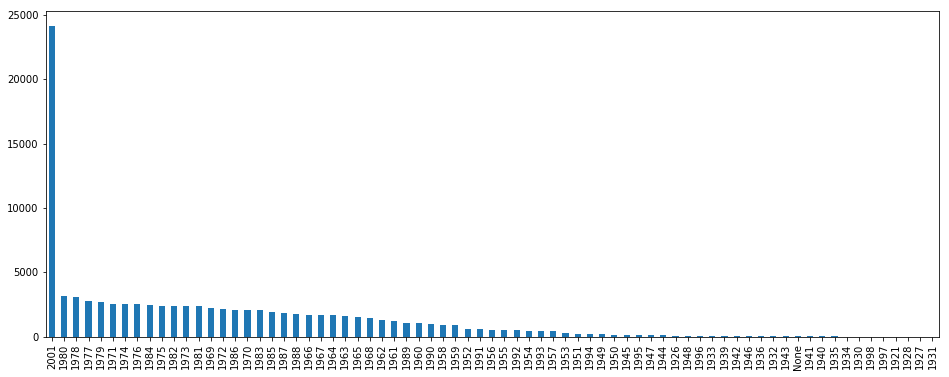

In [121]:
# Birth Year Distribution
pd.value_counts(common_companies_topfeatures['Birth Year']).plot.bar(figsize = (16,6))

In [123]:
NotLaidoff = common_companies_topfeatures[common_companies_topfeatures['laid_off'] == 0]
Laidoff = common_companies_topfeatures[common_companies_topfeatures['laid_off'] == 1]

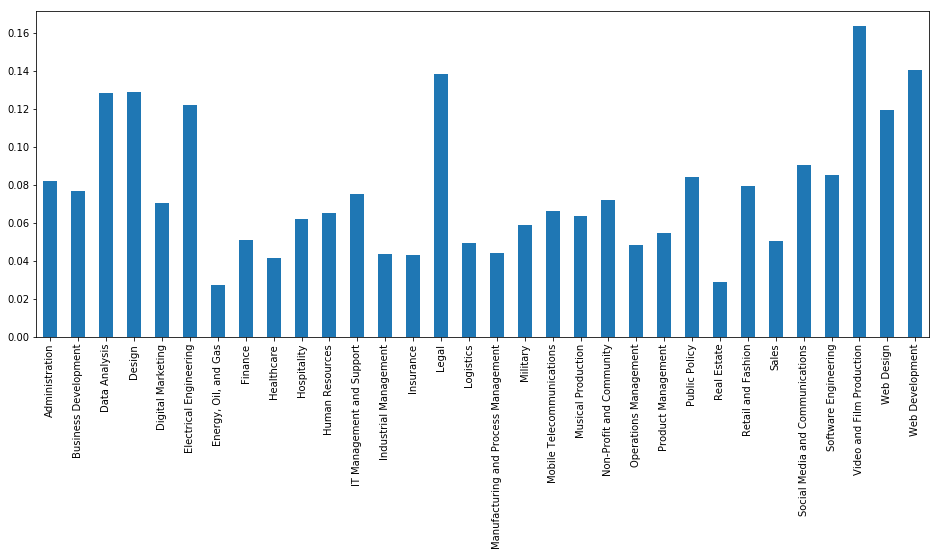

In [124]:
percent=pd.value_counts(Laidoff['Skillset1'])/pd.value_counts(common_companies_topfeatures['Skillset1'])
percent.plot.bar(figsize = (16,6))

Text(0.5, 1.0, 'Distribution of length of employments for industry')

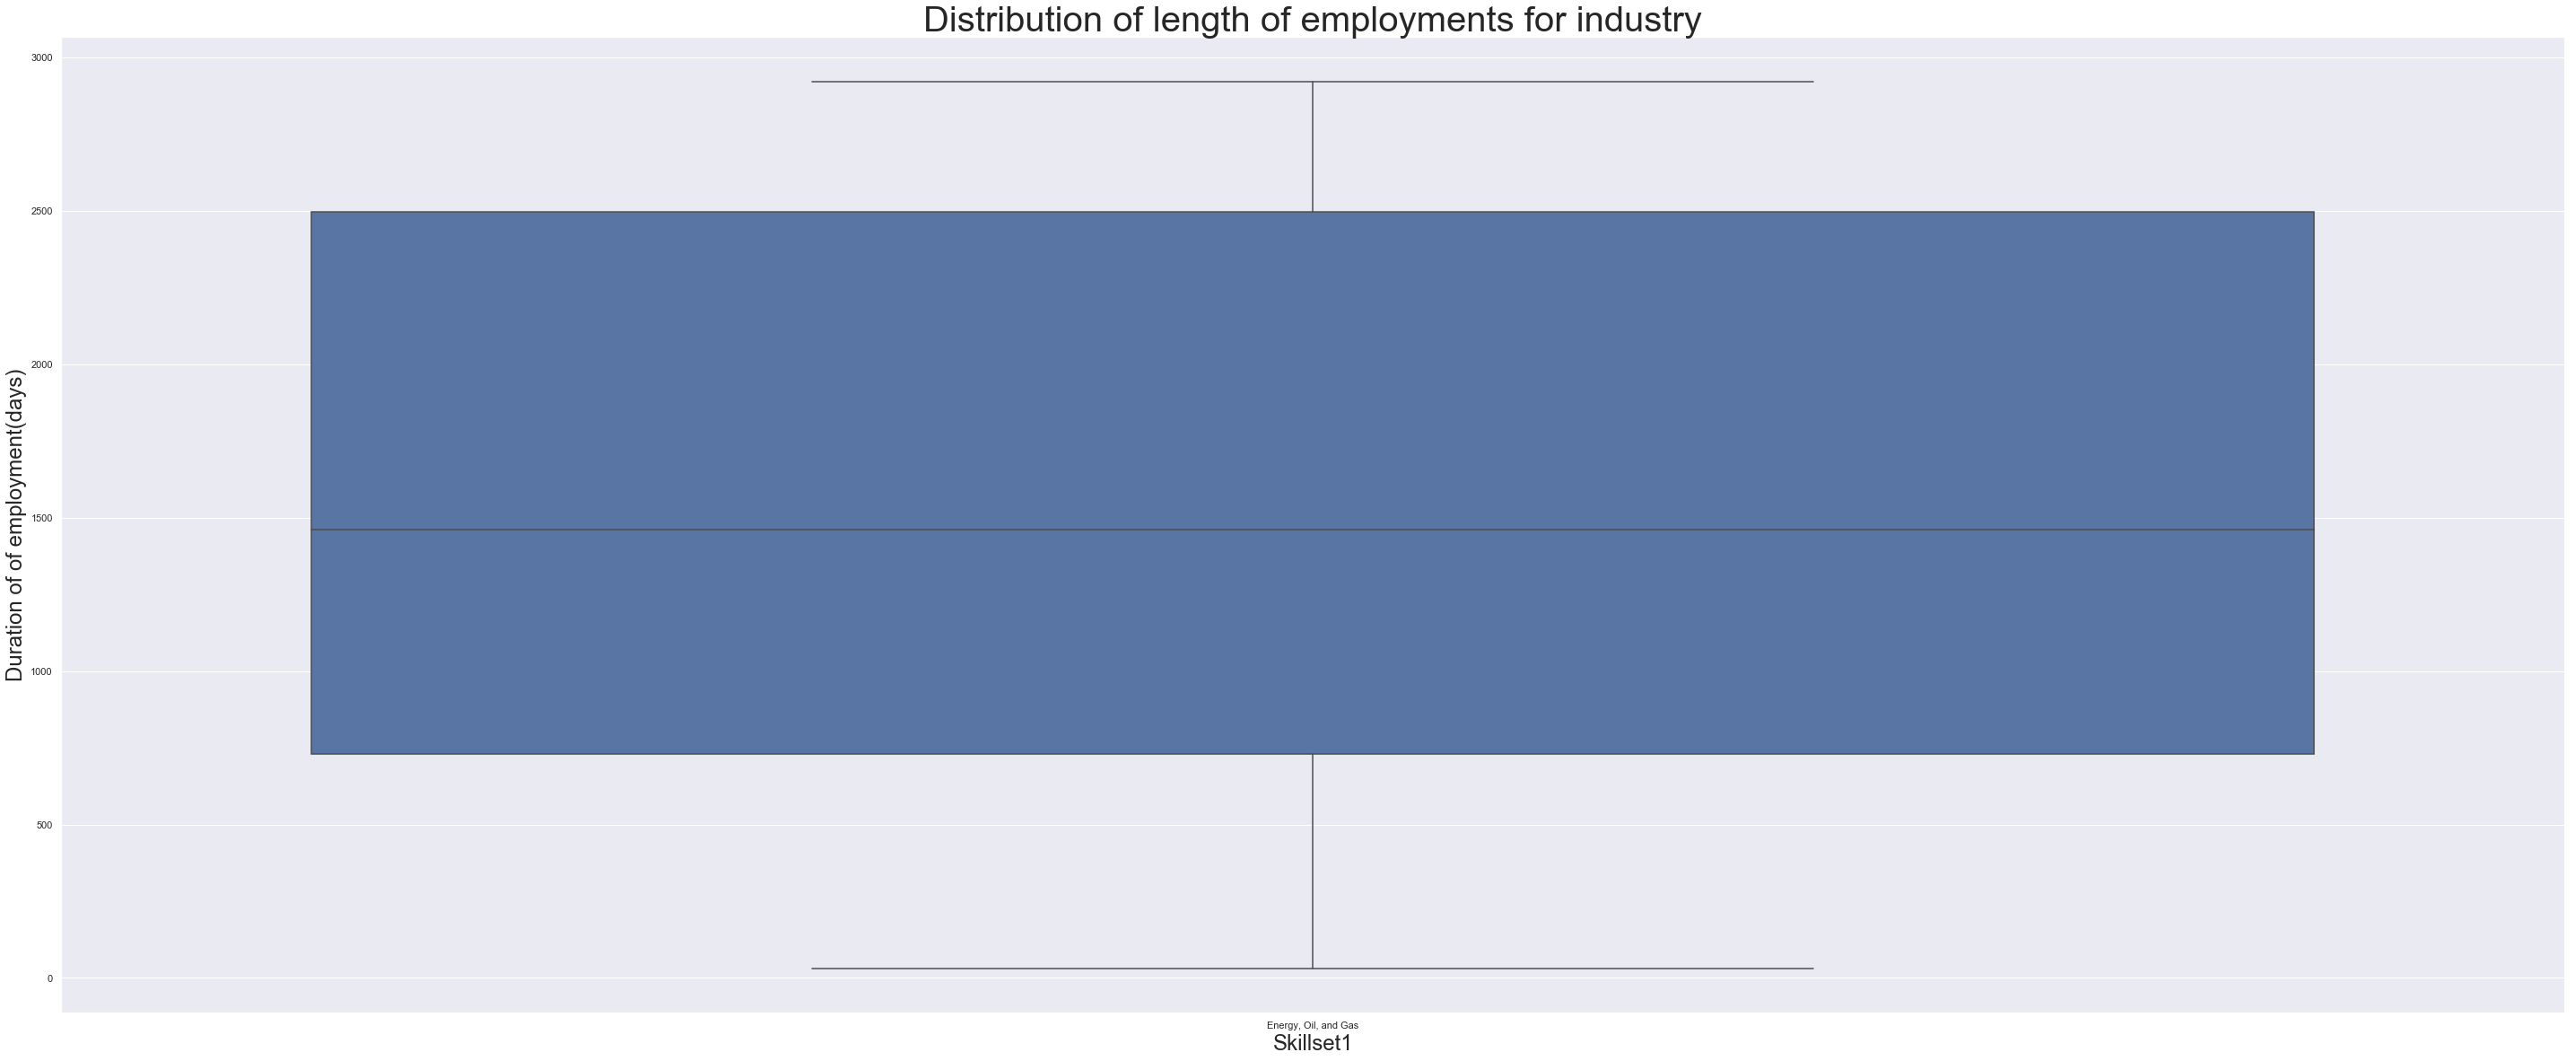

In [136]:
#ax = sns.boxplot(x = 'Skillset1', y = "Length", data = common_companies_topfeatures,  showfliers=False)

ax = sns.boxplot(x = 'Skillset1', y = "Length", data = common_companies_topfeatures[common_companies_topfeatures['Skillset1'] == 'Energy, Oil, and Gas'],  showfliers=False)
sns.set(rc={'figure.figsize':(50,20)})

ax.set_xlabel("Skillset1", fontsize = 24)
ax.set_ylabel("Duration of of employment(days)",fontsize = 24)
ax.axes.set_title("Distribution of length of employments for industry",fontsize=40)

Text(0.5, 1.0, 'Distribution of length of employments for Laidoff')

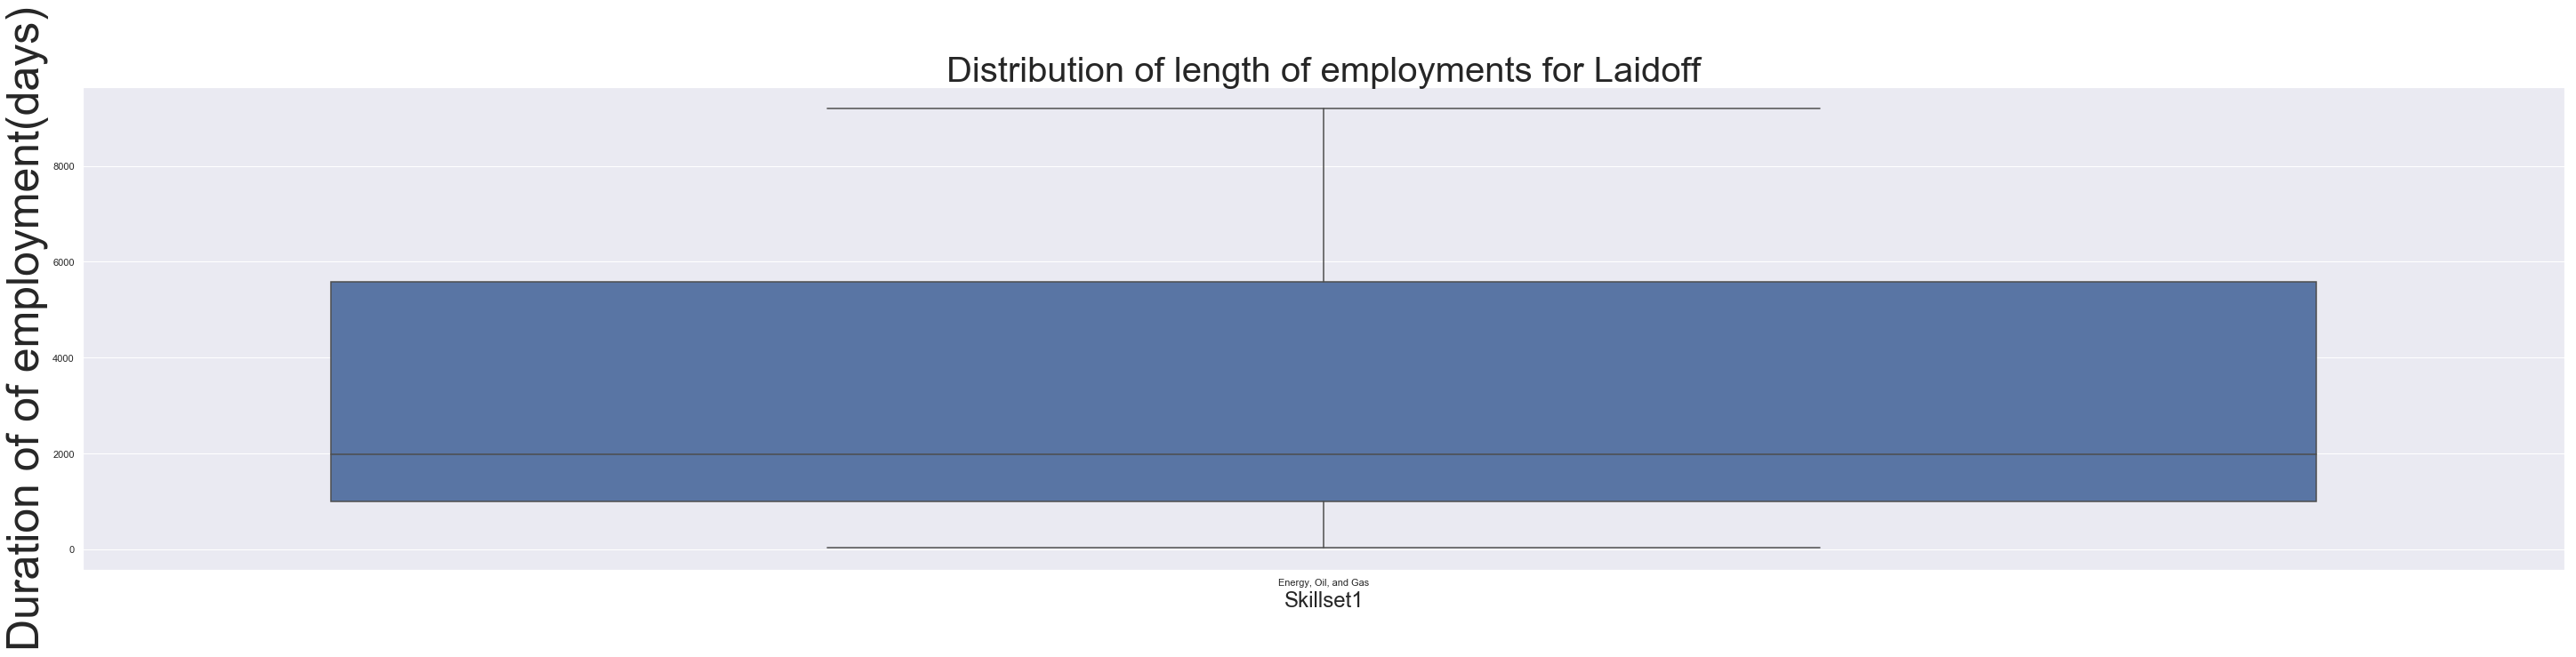

In [139]:
#ax = sns.boxplot(x = 'Skillset1', y = "Length", data = Laidoff,  showfliers=False)
ax = sns.boxplot(x = 'Skillset1', y = "Length", data = Laidoff[Laidoff['Skillset1'] == 'Energy, Oil, and Gas'],  showfliers=False)

sns.set(rc={'figure.figsize':(50,10)})

ax.set_xlabel("Skillset1", fontsize = 24)
ax.set_ylabel("Duration of of employment(days)",fontsize = 50)
ax.axes.set_title("Distribution of length of employments for Laidoff",fontsize=40)

Text(0.5, 1.0, 'Distribution of length of employments')

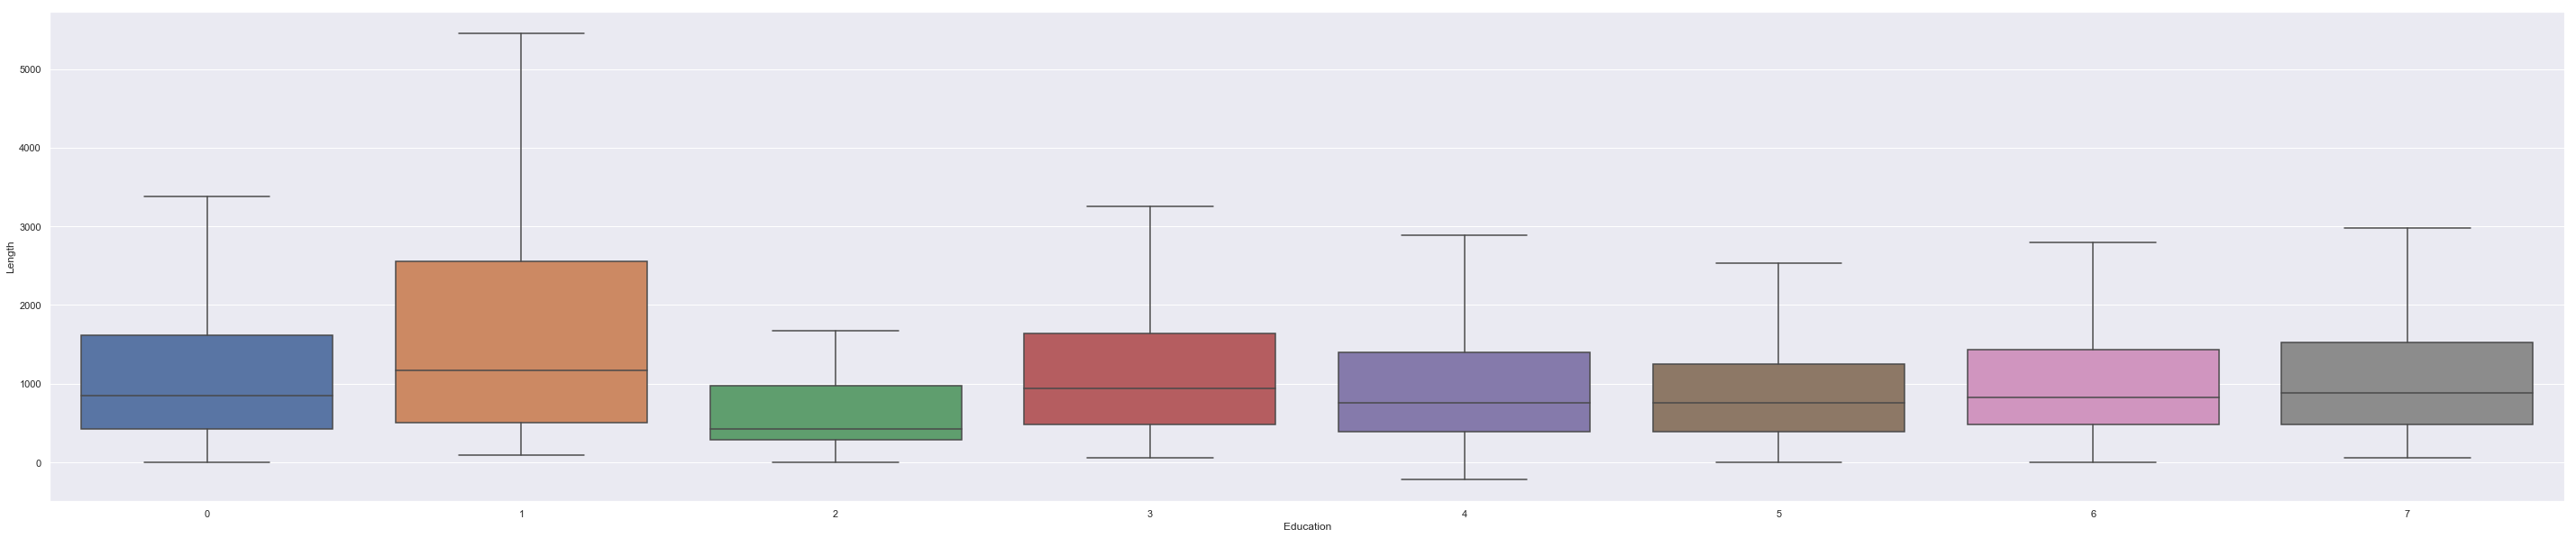

In [130]:
ax2 = sns.boxplot(x = 'Education', y = "Length", data = Laidoff,  showfliers=False)
sns.set(rc={'figure.figsize':(50,10)})

ax.set_xlabel("Skillset1", fontsize = 24)
ax.set_ylabel("Duration of of employment(days)",fontsize = 24)
ax.axes.set_title("Distribution of length of employments",fontsize=40)

Text(0.5, 1.0, 'Distribution of length of employments')

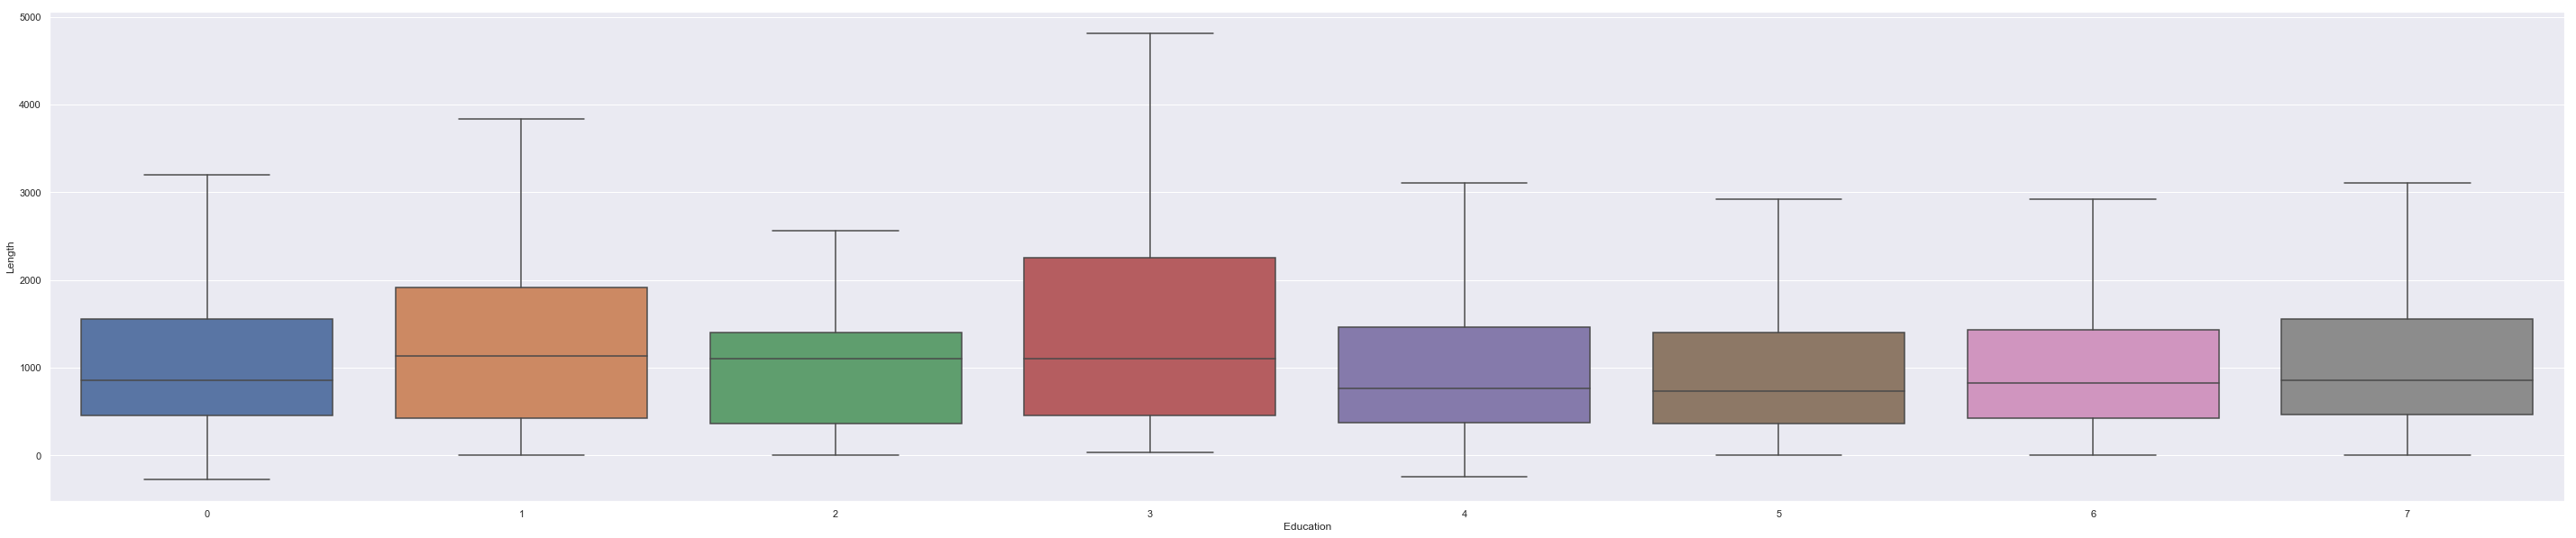

In [141]:
ax2 = sns.boxplot(x = 'Education', y = "Length", data = common_companies_topfeatures,  showfliers=False)
sns.set(rc={'figure.figsize':(50,10)})

ax.set_xlabel("Skillset1", fontsize = 24)
ax.set_ylabel("Duration of of employment(days)",fontsize = 24)
ax.axes.set_title("Distribution of length of employments",fontsize=40)

In [96]:
common_companies_topfeatures.head()

,laid_off,Birth Year,Skillset1,Skillset2,Length,Education,Gender Flag
0,0.0,2001,Software Engineering,Web Development,2922,0,0
1,0.0,2001,Software Engineering,Web Development,2922,0,0
2,0.0,1985,Software Engineering,Web Development,242,5,0
3,0.0,1985,Software Engineering,Web Development,242,5,0
4,0.0,1985,Software Engineering,Web Development,242,5,0


In [70]:
#check for missing data
common_companies_topfeatures.isna().head()

,laid_off,Birth Year,Skillset1,Skillset2,Length,Education,Gender Flag
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [71]:
print("*****Number of NA fields*****")
print(common_companies_topfeatures.isna().sum())

*****Number of NA fields*****
laid_off       7
Birth Year     0
Skillset1      0
Skillset2      0
Length         0
Education      0
Gender Flag    0
dtype: int64


In [72]:
#impute NA values
common_companies_topfeatures.fillna(common_companies_topfeatures.mean(), inplace=True)

C:\Users\whatr\Anaconda3\envs\data-x\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [73]:
print("*****Number of NA fields*****")
print(common_companies_topfeatures.isna().sum())

*****Number of NA fields*****
laid_off       0
Birth Year     0
Skillset1      0
Skillset2      0
Length         0
Education      0
Gender Flag    0
dtype: int64


In [97]:
common_companies_topfeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95770 entries, 0 to 95769
Data columns (total 7 columns):
laid_off       95763 non-null float64
Birth Year     95770 non-null object
Skillset1      95770 non-null object
Skillset2      95770 non-null object
Length         95770 non-null int64
Education      95770 non-null int64
Gender Flag    95770 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 5.1+ MB


In [98]:
#change non-numeric variable to numeric variable
common_companies_topfeatures_labelled=common_companies_topfeatures
labelEncoder = LabelEncoder()
labelEncoder.fit(common_companies_topfeatures_labelled['Skillset1'])
common_companies_topfeatures_labelled['Skillset1'] = labelEncoder.transform(common_companies_topfeatures_labelled['Skillset1'])

labelEncoder = LabelEncoder()
labelEncoder.fit(common_companies_topfeatures_labelled['Skillset2'])
common_companies_topfeatures_labelled['Skillset2'] = labelEncoder.transform(common_companies_topfeatures_labelled['Skillset2'])

labelEncoder = LabelEncoder()
labelEncoder.fit(common_companies_topfeatures_labelled['Birth Year'])
common_companies_topfeatures_labelled['Birth Year'] = labelEncoder.transform(common_companies_topfeatures_labelled['Birth Year'])

C:\Users\whatr\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\whatr\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\whatr\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [99]:
common_companies_topfeatures.head()

,laid_off,Birth Year,Skillset1,Skillset2,Length,Education,Gender Flag
0,0.0,71,28,31,2922,0,0
1,0.0,71,28,31,2922,0,0
2,0.0,57,28,31,242,5,0
3,0.0,57,28,31,242,5,0
4,0.0,57,28,31,242,5,0


In [76]:
common_companies_topfeatures_labelled.head()

,laid_off,Birth Year,Skillset1,Skillset2,Length,Education,Gender Flag
0,0.0,71,28,31,2922,0,0
1,0.0,71,28,31,2922,0,0
2,0.0,57,28,31,242,5,0
3,0.0,57,28,31,242,5,0
4,0.0,57,28,31,242,5,0


In [77]:
common_companies_topfeatures_labelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95770 entries, 0 to 95769
Data columns (total 7 columns):
laid_off       95770 non-null float64
Birth Year     95770 non-null int32
Skillset1      95770 non-null int32
Skillset2      95770 non-null int32
Length         95770 non-null int64
Education      95770 non-null int64
Gender Flag    95770 non-null int64
dtypes: float64(1), int32(3), int64(3)
memory usage: 4.0 MB


In [78]:
X = np.array(common_companies_topfeatures_labelled.drop(['laid_off'], 1).astype(float))

In [79]:
y = np.array(common_companies_topfeatures_labelled['laid_off'])

In [80]:
kmeans = KMeans(n_clusters=2) # cluster into 2 records:laid off and non laid off
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [81]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.8351049389161533


In [82]:
centroids=kmeans.cluster_centers_
labels = kmeans.labels_

centroids

array([[5.28399256e+01, 1.86454132e+01, 1.69693664e+01, 8.36990776e+02,
        3.59070105e+00, 1.18655258e+00],
       [4.84868968e+01, 1.74581762e+01, 1.70954453e+01, 3.85846427e+03,
        3.33110918e+00, 1.23343971e+00]])

In [83]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

In [84]:
class0=ClusterIndicesNumpy(0, kmeans.labels_)
print(class0)
print(len(class0))


[    2     3     4 ... 95767 95768 95769]
85429


In [100]:
common_companies_topfeatures = common_companies[['laid_off','Birth Year','Skillset1','Skillset2','Length','Education','Gender Flag']]

In [101]:
class1_df=common_companies_topfeatures.drop(common_companies_topfeatures.index[[class0]])

In [102]:
class1=ClusterIndicesNumpy(1, kmeans.labels_)
len(class1)

10341

In [103]:
class0_df=common_companies_topfeatures.drop(common_companies_topfeatures.index[[class1]])

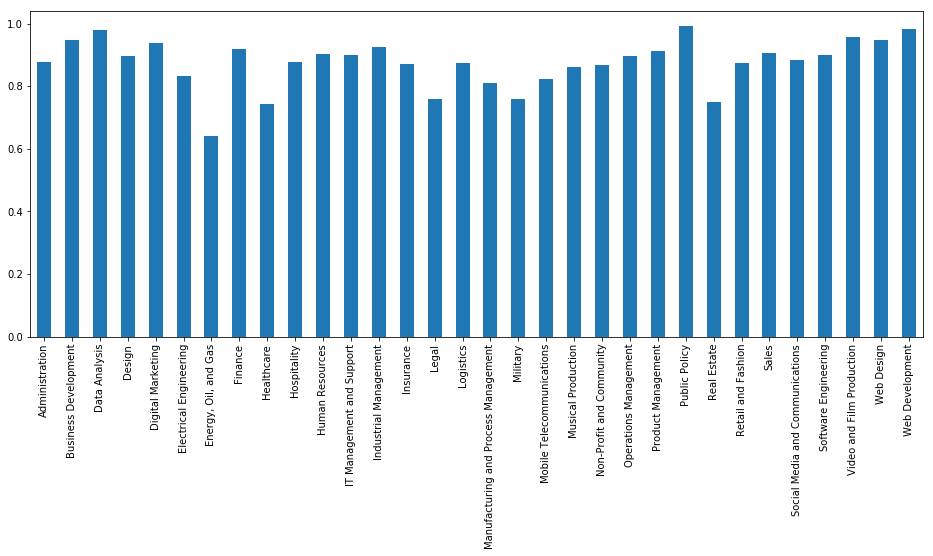

In [106]:
percent=pd.value_counts(class0_df['Skillset1'])/pd.value_counts(common_companies_topfeatures['Skillset1'])
percent.plot.bar(figsize = (16,6))

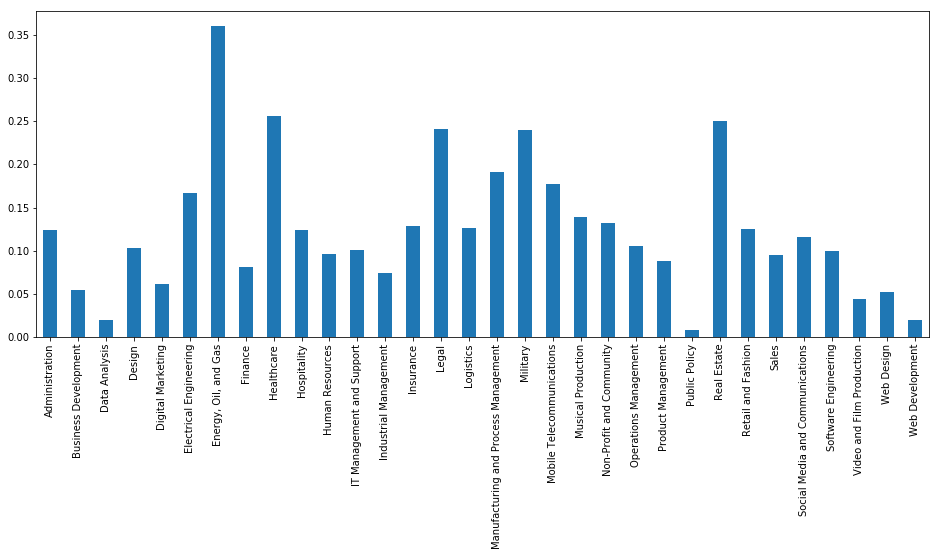

In [107]:
percent=pd.value_counts(class1_df['Skillset1'])/pd.value_counts(common_companies_topfeatures['Skillset1'])
percent.plot.bar(figsize = (16,6))

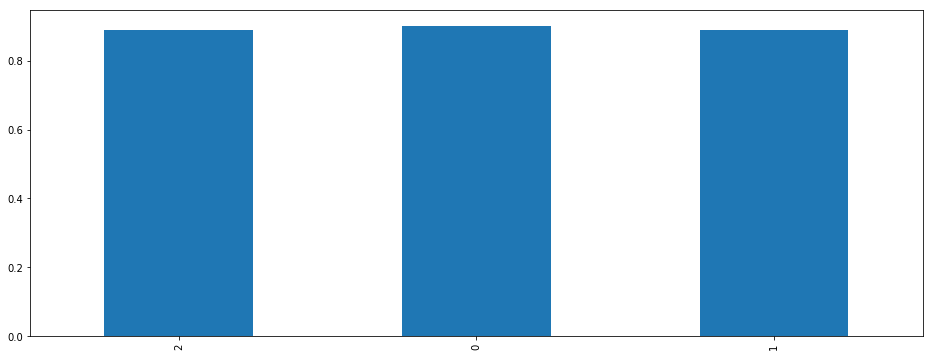

In [112]:
percent=pd.value_counts(class0_df['Gender Flag'])/pd.value_counts(common_companies_topfeatures['Gender Flag'])
percent.plot.bar(figsize = (16,6))

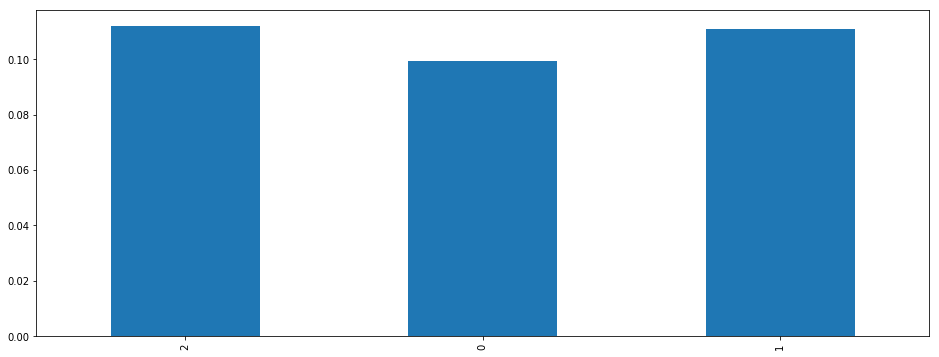

In [113]:
percent=pd.value_counts(class1_df['Gender Flag'])/pd.value_counts(common_companies_topfeatures['Gender Flag'])
percent.plot.bar(figsize = (16,6))

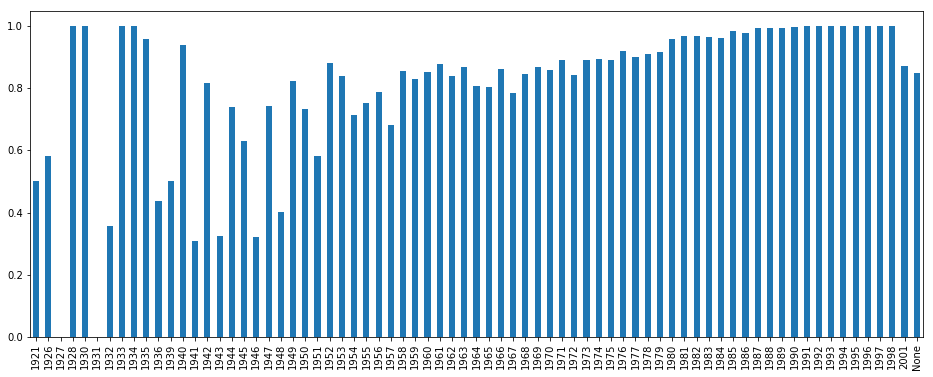

In [114]:
percent=pd.value_counts(class0_df['Birth Year'])/pd.value_counts(common_companies_topfeatures['Birth Year'])
percent.plot.bar(figsize = (16,6))

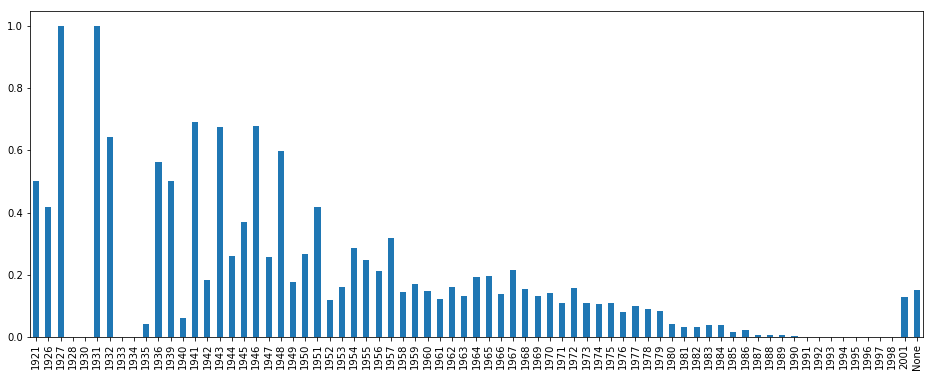

In [115]:
percent=pd.value_counts(class1_df['Birth Year'])/pd.value_counts(common_companies_topfeatures['Birth Year'])
percent.plot.bar(figsize = (16,6))

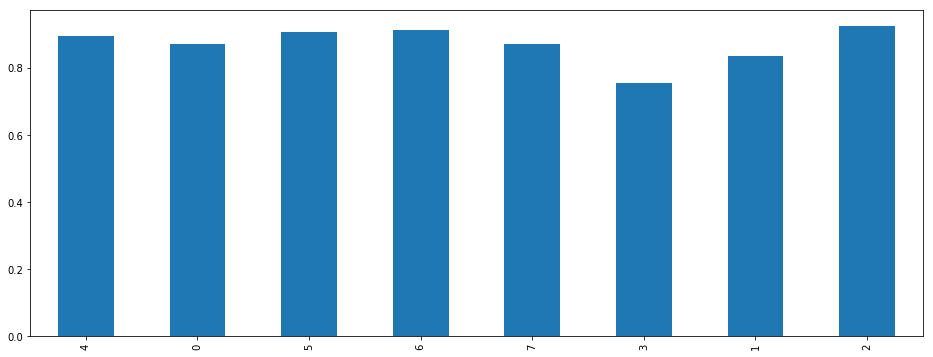

In [117]:
percent=pd.value_counts(class0_df['Education'])/pd.value_counts(common_companies_topfeatures['Education'])
percent.plot.bar(figsize = (16,6))

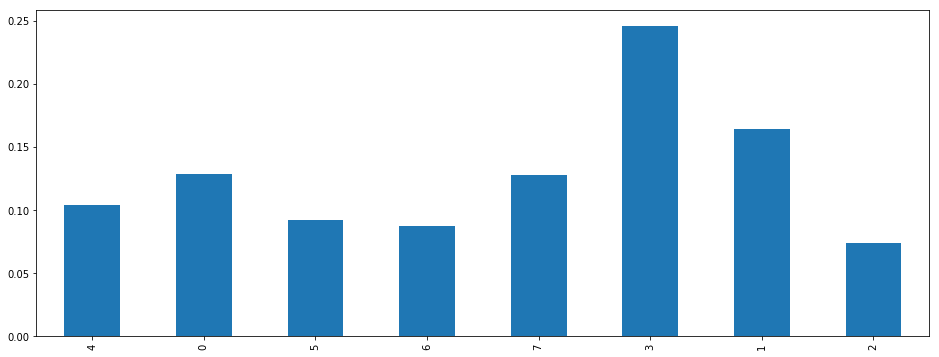

In [118]:
percent=pd.value_counts(class1_df['Education'])/pd.value_counts(common_companies_topfeatures['Education'])
percent.plot.bar(figsize = (16,6))